In [ ]:
from roboflow import Roboflow

rf = Roboflow(api_key="f2Hg5zalSgTOalRQOd41")
project = rf.workspace("work-safe-project").project("safety-vest---v4")
version = project.version(2)
dataset = version.download("coco")
                

In [ ]:
# D:\A\python\PP\nanodet\   config\nanodet-plus-m_320.yml

# %python310% tools/train.py ./config/nanodet-plus-m_320.yml

In [ ]:
%python310% tools/train.py ./config/nanodet-plus-m_416.yml

In [ ]:
! python demo/demo.py image --config ./config/nanodet-plus-m_320.yml --model ./workspace/nanodet-plus-m_320/model_best/model_best.ckpt --path ./tt_final --save_result

In [ ]:
! %python310% ./tools/test.py --config ./config/nanodet-plus-m_320.yml --model ./workspace/nanodet-plus-m_320/model_best/model_best.ckpt

In [ ]:
! %python310% ./tools/flops.py ./config/nanodet-plus-m_320.yml 

# python -m pip install 'git+https://github.com/facebookresearch/mobile-vision.git'

In [ ]:
! python demo/demo.py image --config ./config/nanodet-plus-m_320.yml --model ./workspace/nanodet-plus-m_320/model_best/model_best.ckpt --path ./tt_final --save_result

In [ ]:
from detect import run

result = run(demo="image", config="./config/nanodet-plus-m_416.yml", 
      model="./best.pth", path="./Helmet-Detector-2/test", save_result=True, show_result=False)

In [ ]:
result.result

In [ ]:
from thop import profile
from demo.demo import *
from nanodet.model.arch.nanodet_plus import NanoDetPlus

model = NanoDetPlus(backbone=cfg.model.arch.backbone,
                    fpn=cfg.model.arch.fpn,
                    aux_head=cfg.model.arch.aux_head,
                    head=cfg.model.arch.head,
                    detach_epoch=0)

input_tensor = torch.randn(1, 3, 416, 416)

# 计算 FLOPs 和参数量
flops, params = profile(model, inputs=(input_tensor,))
print(f"FLOPs: {flops / 1e9:.2f} GFLOPs")
print(f"Params: {params / 1e6:.2f} M")


In [ ]:
! python3 tools/export_onnx.py --cfg_path ./config/nanodet-plus-m_416.yml --model_path ./best.pth

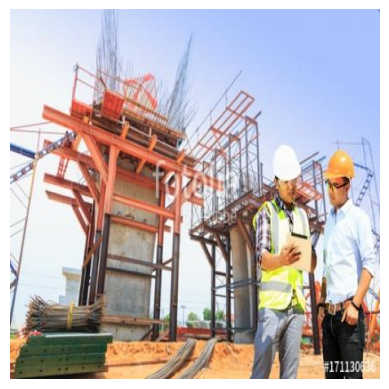

In [1]:
import matplotlib.pyplot as plt
from onnx_detect import my_nanodet

net = my_nanodet(model_pb_path='./nanodet.onnx')

import cv2

img = cv2.imread('./Helmet-Detector-2/test/00254_jpg.rf.33405545a8a55412488a79940342d413.jpg')

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

result = net.detect(img)


In [3]:
result[4]

['capacete', 'sem_colete_refletivo', 'capacete', 'colete_refletivo']

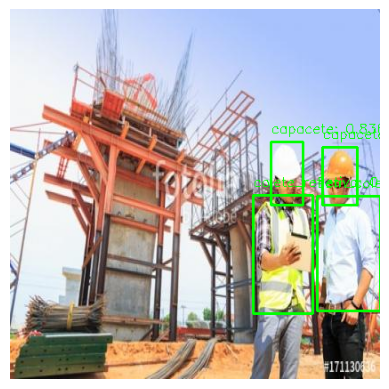

In [4]:
import numpy as np

rec = np.int_(result[1])
for x1, y1, x2, y2 in rec:
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()